In [1]:

import radiative_transfer_bnn as rt

import torch

import numpy as np

import matplotlib.pyplot as plt

import plotter as pltr

import pandas as pd

In [2]:
# def get_nfr(**kwargs):
#     # Define default values
#     n = kwargs.get('n', None)
#     f = kwargs.get('f', None)
#     r = kwargs.get('r', None)


#     # Create a dictionary to map argument names to indices
#     arg_indices = {'n': 0, 'f': 1, 'r': 2}

    

#     wavelength = []
#     mean_pred_results = torch.empty(200,3,113)
#     std_pred_results = torch.empty(200,3,113)
#     x_test = torch.empty(200,3,113)
#     y_test = torch.empty(200,3,113)


#     for key, value in kwargs.items():
        
#         model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, value)
#         model.preprocess_data()
#         model.train_model(250, 200)
#         wavelength = model.wavelength
#         mean_pred_results[:,arg_indices[value],:], std_pred_results[:,arg_indices[value],:] = model.test_model()
#         x_test[:,arg_indices[value],:] = model.X_test
#         y_test[:,arg_indices[value],:] = model.y_test

#     return wavelength, mean_pred_results, std_pred_results, x_test, y_test


            

    




In [3]:
# wavelength, mean_pred_results, std_pred_results, x_test, y_test = get_nfr(arg1 = 'n', arg2 = 'f', arg3 = 'r')

In [4]:
# model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, 'flux')
# model.preprocess_data()
# model.train_model(250, 200)
# wavelength = model.wavelength
# mean_pred_results, std_pred_results = model.test_model()
# x_test = model.X_test
# y_test = model.y_test

In [5]:
# print(x_test.shape)

In [6]:
# star_mass = torch.linspace(10.5, 10.5, 20)
# dust_mass = torch.linspace(7, 7, 20)
# theta = torch.linspace(-180, 180, 20)
# x_pred = model.create_predict_tensor(star_mass, dust_mass, theta)
# print(x_pred.shape)
# mean_pred_results, std_pred_results = model.predict(x_pred)

In [7]:
# plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
# plotter.plot_same_ax(0,20,1)

#it's not changing enough for angle
# you can only notice a change by going outside the range of values
#is this to do with normalisation when training the model?
# most likely
#is it worth seeing how SKIRT changes with angle?
#maybe create a function that groups SKIRT data over a range, no we need to generate more for fixed values
#see if the sub-runs are any different, for, like, 3-4 runs; if no conclusive difference, then yeah

In [8]:
# np.savez('data_file.npz', wavelength=wavelength, mean_pred_results=mean_pred_results,
#         std_pred_results=std_pred_results, x_test=x_test, y_test=y_test)

In [9]:
loaded_data = np.load('data_file.npz')
wavelength = loaded_data['wavelength']
mean_pred_results = loaded_data['mean_pred_results']
std_pred_results = loaded_data['std_pred_results']
x_test = loaded_data['x_test']
y_test = loaded_data['y_test']

In [10]:
print(x_test.shape)

(230, 3)


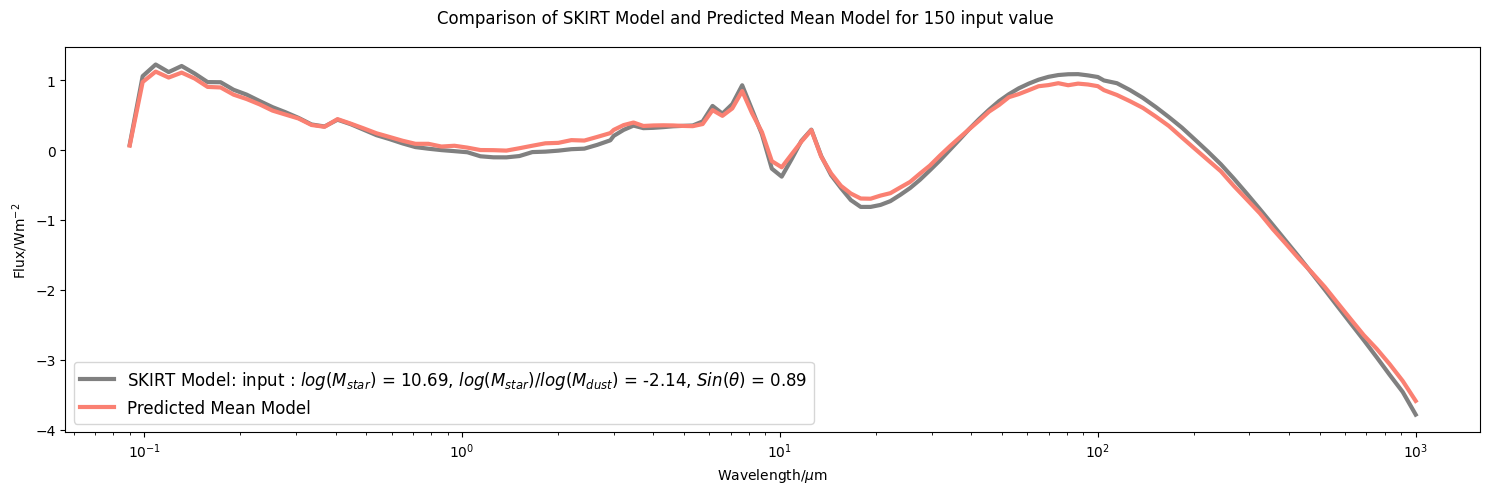

In [11]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")

plotter.plot_single(150, "grey", "salmon")
#plotter.plot_group_same(100, 120, "grey", "salmon")
#plotter.plot_same_ax(100,200,1)

#plotter.save_figure("test.png")


In [12]:
#write prdeict function on saved model
#linear interpolation of extremes
#can only predict within the range of the training data
#what about extrapolation?
#comapare for extraploation can use predict function
#what is the uncertainty of the prediction
#Produce SED 

In [13]:
#plotter function add std deviation
#change labels
#cost_vs_epochs plot
#ask steven about datd
#generate data for fixed values

